# Project Title
* Movie Market Analysis

# Project Overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

Business Problem
* Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Goals
  
The objective is to identify which types of movies perform best commercially and critically, and to translate these insights into clear business recommendations on what kinds of films the studio should produce.


## Data loading and initial inspection

Multiple datasets are used to capture box office performance, production budgets, genres, and audience and critic ratings.  
Before analysis, we inspect the structure and completeness of each dataset.


In [1]:
# Loading the libraries

import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import sqlite3

In [2]:
# loading the csv files
movie_gross = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
movies = pd.read_csv('../zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')

# loading the tsv files
movie_info = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('../zippedData/rt.reviews.tsv.gz',sep='\t',encoding='latin1')


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [9]:
# converting tsv files to csv  files 
movie_info.to_csv('rt.movie_info.csv',index=False)

reviews.to_csv('rt.reviews.csv',index=False)

In [10]:
# unzipping the database
import zipfile

with zipfile.ZipFile('../zippedData/im.db.zip','r') as zip_ref:
    zip_ref.extractall('zippedData')

In [11]:
# creating a database connection
conn = sqlite3.connect('zippedData\im.db')
cursor = conn.cursor()

In [12]:
# importing the IMDB database

imdb_tables = """
    SELECT *
    FROM sqlite_master 
    WHERE type = 'table';
    """

pd.read_sql(imdb_tables,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Methods

**MOVIE GROSS DATA**

checking and cleaning

In [13]:
# preview the box office dataset and check its dimensions
movie_gross.head(), movie_gross.shape

#The box office dataset contains 3,387 rows, with each row representing a single movie.  
#It includes five variables: the movie title (used as a join key), the distributing studio, domestic box office revenue, foreign box office revenue, and the year of release.


(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
   foreign_gross  year  
 0     652000000  2010  
 1     691300000  2010  
 2     664300000  2010  
 3     535700000  2010  
 4     513900000  2010  ,
 (3387, 5))

In [14]:
# inspect data types and check for missing values in the box office dataset
movie_gross.info()

# The dataset shows some missing values and inconsistent data types.  
#While movie titles and release years are complete, studio information is missing for a small number of films.  
#Domestic gross revenue is mostly available, but foreign gross revenue is missing for a large share of movies and is currently stored as a string rather than a numeric value.  
#These issues need to be addressed before analysing financial performance.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# clean revenue variables

We will:
* convert foreign_gross to numeric
* create a total gross revenue variable
* remove movies with no revenue information

After converting revenue variables to numeric format and removing movies with missing box office data, the dataset is reduced to 2,004 movies.  
These films have complete information on total box office revenue and form the basis for the financial performance analysis.


We intentionally dropped movies with no usable revenue

This is correct because:

success is defined by box office performance

keeping missing revenue would weaken conclusions

In [15]:
# convert foreign gross to numeric
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# create total box office revenue
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

# drop movies without revenue data
movie_gross_clean = movie_gross.dropna(subset=['total_gross'])

movie_gross_clean.shape




(2004, 6)

In [16]:
# check for duplicate movie titles in the box office dataset
movie_gross_clean.duplicated(subset=['title']).sum()

# A duplicate check on movie titles in the box office dataset confirms that there are no duplicate entries.  
#Each movie appears only once, making the dataset suitable for merging with other movie-level data.



0

# Movie metadata- checking and cleaning

## Results

In [17]:
movies.head(), movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


(   Unnamed: 0            genre_ids     id original_language  \
 0           0      [12, 14, 10751]  12444                en   
 1           1  [14, 12, 16, 10751]  10191                en   
 2           2        [12, 28, 878]  10138                en   
 3           3      [16, 35, 10751]    862                en   
 4           4        [28, 878, 12]  27205                en   
 
                                  original_title  popularity release_date  \
 0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
 1                      How to Train Your Dragon      28.734   2010-03-26   
 2                                    Iron Man 2      28.515   2010-05-07   
 3                                     Toy Story      28.005   1995-11-22   
 4                                     Inception      27.920   2010-07-16   
 
                                           title  vote_average  vote_count  
 0  Harry Potter and the Deathly Hallows: Part 1           7.7       1078

In [18]:
# preview movie metadata and check dimensions
movies.head(), movies.shape

# The movie metadata dataset contains 26,517 movies and nine variables. with information on genres, language, popularity, release dates, and audience ratings.  
# For this analysis, the most relevant variables are the movie title, genre information, and audience ratings, which can be linked to box office performance to support production decisions.
# This dataset is much larger than the box office dataset
# We will not analyse all 26,000 movies
# We will later merge and filter to only movies with revenue data

(   Unnamed: 0            genre_ids     id original_language  \
 0           0      [12, 14, 10751]  12444                en   
 1           1  [14, 12, 16, 10751]  10191                en   
 2           2        [12, 28, 878]  10138                en   
 3           3      [16, 35, 10751]    862                en   
 4           4        [28, 878, 12]  27205                en   
 
                                  original_title  popularity release_date  \
 0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
 1                      How to Train Your Dragon      28.734   2010-03-26   
 2                                    Iron Man 2      28.515   2010-05-07   
 3                                     Toy Story      28.005   1995-11-22   
 4                                     Inception      27.920   2010-07-16   
 
                                           title  vote_average  vote_count  
 0  Harry Potter and the Deathly Hallows: Part 1           7.7       1078

In [19]:
# drop redundant index column
movies_clean = movies.drop(columns=['Unnamed: 0'])

movies_clean.head(), movies_clean.shape


(             genre_ids     id original_language  \
 0      [12, 14, 10751]  12444                en   
 1  [14, 12, 16, 10751]  10191                en   
 2        [12, 28, 878]  10138                en   
 3      [16, 35, 10751]    862                en   
 4        [28, 878, 12]  27205                en   
 
                                  original_title  popularity release_date  \
 0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
 1                      How to Train Your Dragon      28.734   2010-03-26   
 2                                    Iron Man 2      28.515   2010-05-07   
 3                                     Toy Story      28.005   1995-11-22   
 4                                     Inception      27.920   2010-07-16   
 
                                           title  vote_average  vote_count  
 0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
 1                      How to Train Your Dragon           7.7      

In [20]:
# check for missing values in the movie metadata dataset
movies_clean.isna().sum()

# A check for missing values confirms that the movie metadata dataset has no missing observations across all variables.  
# This indicates that the dataset is clean and reliable for use in subsequent analysis.

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [21]:
# check for duplicate movie titles in the movie metadata dataset
movies_clean.duplicated(subset=['title']).sum()

#A duplicate check reveals that 1,829 movie titles appear more than once in the metadata dataset.  
#This indicates that some titles are associated with multiple records, which could lead to ambiguous matches when merging with box office data.  
#Duplicates must therefore be resolved before proceeding with data integration.


1829

In [22]:
# inspect duplicated titles
duplicate_titles = movies_clean[movies_clean.duplicated(subset=['title'], keep=False)]

duplicate_titles[['title', 'release_date', 'vote_average']].head(100)

#Duplicate movie titles in the metadata dataset largely reflect films released in different years or remakes with the same name.  
#To ensure accurate merging with box office data, metadata records will be matched to box office entries using both movie title and release year.



,title,release_date,vote_average
3,Toy Story,1995-11-22,7.9
10,Toy Story 2,1999-11-24,7.5
11,Alice in Wonderland,2010-03-05,6.6
26,Bad Boys,1995-04-07,6.6
36,Robin Hood,2010-05-14,6.3
...,...,...,...
1274,On Strike for Christmas,2011-09-06,4.9
1275,Actresses,2010-05-22,6.8
1292,Altiplano,2010-06-07,5.5
1302,Rage,2010-05-01,4.3


In [23]:
# extract release year from release_date
movies_clean['release_year'] = pd.to_datetime(
    movies_clean['release_date'],
    errors='coerce'
).dt.year

movies_clean[['title', 'release_date', 'release_year']].head()

#Release year was successfully extracted from the movie metadata dataset.  
#This variable will later be used to accurately match movie records with box office data and resolve duplicate titles during merging.

,title,release_date,release_year
0,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,2010
1,How to Train Your Dragon,2010-03-26,2010
2,Iron Man 2,2010-05-07,2010
3,Toy Story,1995-11-22,1995
4,Inception,2010-07-16,2010


From the preview:

These are legitimate movies, not messy duplicates

Titles repeat because:

same names exist across years (e.g. Robin Hood)

sequels share similar naming (Toy Story, Toy Story 2)

This dataset does not include release year as a clean numeric column, only release_date

Because our box office dataset already contains year, we can use that to select the correct movie record.

When merging movie metadata with box office data:

keep the metadata record whose release year matches the box office year

this avoids arbitrary deletion and preserves correctness

# Movie budget - data cleaning

In [24]:
# inspect column names in the movie budgets dataset
movie_budgets.columns

#An inspection of the movie budgets dataset shows that it contains key identifiers and financial variables, including movie titles, release dates, production budgets, and box office revenues.  
#These variables make the dataset suitable for analysing the relationship between production costs and financial performance.



Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [25]:
# check shape and data types of the movie budgets dataset
movie_budgets.info()

#The movie budgets dataset contains 5,782 movies and has no missing values across its variables.  
#However, production budget and revenue fields are stored as text, indicating that these variables will need to be converted to numeric format before analysis.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
## cleaning production budget and revenue data
#"""
#The production budget and revenue variables are currently stored as text, likely due to currency symbols and commas.  
#These variables are converted to numeric format to allow comparison between production costs and financial returns.
#"""

# remove currency symbols and commas, then convert to numeric
# remove currency symbols and commas, then convert to numeric

budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in budget_cols:
    movie_budgets[col] = (
        movie_budgets[col]
        .astype(str)  # ensures .str works even if already numeric
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
    )
    movie_budgets[col] = pd.to_numeric(movie_budgets[col], errors='coerce')

movie_budgets[budget_cols].dtypes

#"""#After removing currency symbols and converting values to numeric format, production budget and revenue variables are now stored as numeric types.  
#This allows direct comparison between production costs and box office returns in later analysis.
#"""


production_budget    int64
domestic_gross       int64
worldwide_gross      int64
dtype: object

In [27]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [28]:
movie_budgets.isna().sum()

#No missing values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [29]:
# check for duplicate movie titles in the budget dataset
movie_budgets.duplicated(subset=['movie']).sum()

#A duplicate check reveals that 84 movie titles appear more than once in the budget dataset.  
#These duplicates likely reflect multiple records for the same film or alternative budget and revenue estimates.  
#Rather than removing records prematurely, duplicates will be addressed during the merging stage using release year and revenue consistency.



84

In [30]:
# inspect data types and check for missing values in the box office dataset
movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     2004 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


# Rotten tomatoes metadata

In [31]:
# preview Rotten Tomatoes movie information

"""
The Rotten Tomatoes movie information dataset was explored to assess whether it adds value beyond existing box office and audience rating data.  
While the dataset contains limited financial information, it provides MPAA content ratings that are useful for understanding audience targeting.  
As a result, only selected variables from this dataset will be considered in later analysis.
"""
movie_info.head(), movie_info.shape

(   id                                           synopsis rating  \
 0   1  This gritty, fast-paced, and innovative police...      R   
 1   3  New York City, not-too-distant-future: Eric Pa...      R   
 2   5  Illeana Douglas delivers a superb performance ...      R   
 3   6  Michael Douglas runs afoul of a treacherous su...      R   
 4   7                                                NaN     NR   
 
                                  genre          director  \
 0  Action and Adventure|Classics|Drama  William Friedkin   
 1    Drama|Science Fiction and Fantasy  David Cronenberg   
 2    Drama|Musical and Performing Arts    Allison Anders   
 3           Drama|Mystery and Suspense    Barry Levinson   
 4                        Drama|Romance    Rodney Bennett   
 
                             writer  theater_date      dvd_date currency  \
 0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
 1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013       

In [32]:
movie_info.columns


Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [33]:
# check number of missing values in each column
"""
A missing value check shows that the Rotten Tomatoes movie information dataset has complete movie IDs, but several descriptive and financial fields are incomplete.  
Synopsis (62), rating (3), and genre (8) are mostly available, while director (199) and writer (449) are missing for some movies.  
Financial and studio-related fields have substantial missingness, including currency (1,220), box office (1,220), and studio (1,066), suggesting these variables may not be reliable for financial analysis.

"""
movie_info.isna().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [34]:
"""
Although the Rotten Tomatoes dataset contains additional descriptive variables such as studio and box office revenue, these fields contain substantial missing values and are therefore not reliable for analysis.  
Financial performance is instead drawn from dedicated box office and budget datasets with more complete coverage.  
The Rotten Tomatoes data is used selectively to capture MPAA content ratings, which provide insight into audience targeting.

"""
"""
The MPAA content rating variable has only three missing values out of 1,560 movies.  
Given the negligible level of missingness, these observations do not materially affect the analysis and are excluded only where MPAA ratings are required.

"""

# retain only decision-relevant and relatively complete columns
movie_info = movie_info[['id', 'rating', 'genre', 'runtime', 'theater_date']]

# check missing values again after subsetting
movie_info.isna().sum()


id                0
rating            3
genre             8
runtime          30
theater_date    359
dtype: int64

In [35]:
"""
A duplicate check using the Rotten Tomatoes movie identifier confirms that there are no duplicate movie records in the dataset.  
Each row represents a unique film, making the dataset suitable for selective use in the analysis.

"""

# check for duplicate Rotten Tomatoes movie IDs
movie_info.duplicated(subset=['id']).sum()


0

# Rotten Tomatoes dataset: reviews dataset

In [36]:
reviews.head(),reviews.shape

(   id                                             review rating   fresh  \
 0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
 1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
 2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
 3   3  Continuing along a line introduced in last yea...    NaN   fresh   
 4   3             ... a perverse twist on neorealism...     NaN   fresh   
 
            critic  top_critic         publisher               date  
 0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
 1  Annalee Newitz           0           io9.com       May 23, 2018  
 2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
 3   Daniel Kasman           0              MUBI  November 16, 2017  
 4             NaN           0      Cinema Scope   October 12, 2017  ,
 (54432, 8))

In [37]:
"""
The Rotten Tomatoes reviews dataset contains 54,432 rows and eight variables, with each row representing an individual critic review rather than a movie.  
The dataset includes review text, critic ratings, Fresh/Rotten classification, critic and publisher information, and review dates.  
While most identifier and classification fields are complete, some review text and critic rating fields contain missing values, reflecting incomplete review records.

"""

# preview the Rotten Tomatoes reviews dataset
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [38]:
"""
The Rotten Tomatoes reviews dataset contains substantial missing values in critic ratings and review text.  
Rather than imputing these values, the analysis focuses on variables with complete coverage, such as Fresh/Rotten classification and top critic indicators, which provide a consistent measure of critic sentiment.

"""

# check missing values in the reviews dataset
reviews.isna().sum()


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [39]:
"""
Duplicate reviews by the same critic for the same movie were identified and addressed.  
Reviews with missing critic identifiers were retained, as critic names are not required for sentiment aggregation.  
The cleaned dataset is therefore suitable for aggregating Fresh/Rotten sentiment at the movie level.

"""
# check for duplicate reviews by the same critic for the same movie
reviews.duplicated(subset=['id', 'critic']).sum()


2220

In [40]:
"""
After removing duplicate reviews by the same critic for the same movie, no duplicate records remain in the reviews dataset.  
This confirms that the dataset is clean and suitable for aggregation at the movie level.

"""

# remove duplicate reviews by the same critic for the same movie
reviews_clean = reviews.drop_duplicates(subset=['id', 'critic'])

#reviews_clean.shape
reviews_clean.duplicated(subset=['id', 'critic']).sum()


0

## Theme 1: what genres to prioritise or avoid

Question we are answering
* Which genres consistently deliver stronger box office performance (and which underperform), so the studio knows what to produce first.

Datasets to use
* Box office: movie_gross_clean (revenue)
* tmdb metadata: movies_clean (genres)

Columns we need
* From movie_gross_clean: title, year, total_gross (and optionally domestic_gross, foreign_gross)
* From movies_clean: title, genre_ids (optional: popularity, vote_average, vote_count but not needed for this theme)

Merge logic
* Merge on title first (then sanity-check year coverage using year from box office and release_year from tmdb if you derive it from release_date)
* After merging, explode genres (because one movie can belong to multiple genres)

Analysis outputs
* Total and average total_gross by genre
* Include count of movies per genre so we don’t over-trust small samples

End goal
A ranked list of genres: prioritise (high-performing + enough volume) vs avoid (low-performing or too inconsistent), with one clear visual (bar chart or boxplot).

Although the Rotten Tomatoes reviews dataset contains critic ratings, a substantial proportion of these values are missing and the ratings are not standardised across reviewers.  
As a result, critic ratings are not used as the primary rating metric in this analysis.  
Instead, MPAA content ratings from the Rotten Tomatoes movie information dataset are used to assess audience targeting, while critic sentiment (Fresh vs Rotten) may be used selectively as supporting evidence.

Although critic review data was available, the analysis focuses on box office performance, audience ratings, and production budgets, as these variables most directly inform commercial production decisions.  
Critic review data was therefore not included as a primary input to the recommendations.


# STEP 1: Loading revenue dataset

In [41]:
"""
## theme 1: genres to prioritise or avoid

## preparing box office data for genre analysis

This section links box office revenue to movie genres to identify which genres consistently deliver stronger financial performance.  
The analysis focuses on total box office revenue (as the main indicator of commercial success) and compares genre performance using average revenue and movie counts to avoid over-interpreting small samples.

"""

# select only the columns needed for genre analysis
boxoffice_genre = movie_gross_clean[['title', 'year', 'total_gross']].copy()

# inspect the prepared box office data
boxoffice_genre.head(), boxoffice_genre.shape


(                                         title  year   total_gross
 0                                  Toy Story 3  2010  1.067000e+09
 1                   Alice in Wonderland (2010)  2010  1.025500e+09
 2  Harry Potter and the Deathly Hallows Part 1  2010  9.603000e+08
 3                                    Inception  2010  8.283000e+08
 4                          Shrek Forever After  2010  7.526000e+08,
 (2004, 3))

# STEP 2: Loading genre dataset

In [42]:
## preparing genre data from tmdb
"""
Movie genres are drawn from the TMDB metadata dataset.  
Each movie may belong to multiple genres, which will be handled after merging with box office data.
"""
# select only title and genre information from TMDB
genres_tmdb = movies_clean[['title', 'genre_ids']].copy()

# inspect the genre data
genres_tmdb.head(), genres_tmdb.shape



(                                          title            genre_ids
 0  Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]
 1                      How to Train Your Dragon  [14, 12, 16, 10751]
 2                                    Iron Man 2        [12, 28, 878]
 3                                     Toy Story      [16, 35, 10751]
 4                                     Inception        [28, 878, 12],
 (26517, 2))

# STEP 3: Merge both datasets

In [43]:
## merging box office revenue with movie genres
## Keep ONLY movies that appear in both datasets
"""
Box office revenue data is merged with TMDB genre information using movie titles.  
This creates a combined dataset that links financial performance to movie genres.
"""

"""
The TMDB metadata dataset contains a much larger set of movies than the box office dataset.  
After merging, only movies with both genre information and recorded box office revenue are retained.  
This ensures that genre performance is evaluated using films with observable commercial outcomes.

"""

"""
After merging box office revenue with TMDB genre information, the combined dataset contains 1,696 movies.  
Each row represents a movie with recorded box office revenue and one or more associated genre identifiers.  
Because movies can belong to multiple genres, genre information is currently stored as a list within each row and must be expanded before genre-level analysis.
"""

"""
After converting genre identifiers from string format to lists, the dataset was expanded so that each row represents a single movie–genre combination.  
This ensures that movies belonging to multiple genres contribute appropriately to genre-level revenue analysis.

"""

# merge box office revenue with TMDB genre data
genre_revenue = boxoffice_genre.merge(genres_tmdb, on='title', how='inner')

# confirm genre_ids are strings
type(genre_revenue.loc[0, 'genre_ids'])

#import ast

# convert string representations of lists into actual Python lists
genre_revenue['genre_ids'] = genre_revenue['genre_ids']

# confirm the conversion worked
type(genre_revenue.loc[0, 'genre_ids']), genre_revenue.loc[0, 'genre_ids']

"""
Many movies belong to more than one genre.  
To evaluate genre performance accurately, the dataset is expanded so that each row represents a single movie–genre combination.
"""
# explode so each row is one movie–genre combination
genre_revenue_expanded = genre_revenue.explode('genre_ids')

# confirm explode worked
genre_revenue_expanded['genre_ids'].head(10), genre_revenue_expanded.shape

(0            [16, 10751, 35]
 1              [28, 878, 12]
 2    [35, 12, 14, 16, 10751]
 3        [12, 14, 18, 10749]
 4              [12, 28, 878]
 5                [16, 10751]
 6            [16, 10751, 35]
 7        [14, 12, 16, 10751]
 8            [12, 10751, 14]
 9                   [18, 36]
 Name: genre_ids, dtype: object,
 (1696, 4))

# STEP 4: Mapping the genre names

In [44]:
## mapping tmdb genre identifiers to genre names

"""
To make the results interpretable, numeric TMDB genre identifiers are mapped to their corresponding genre names.
"""
# TMDB genre ID to genre name mapping
genre_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


"""
TMDB genre identifiers are numeric codes that correspond to predefined genre categories used by The Movie Database (TMDB).  
These identifiers were mapped to their respective genre names using TMDB’s official genre definitions to improve interpretability of the results.

"""
# apply mapping
genre_revenue_expanded['genre'] = genre_revenue_expanded['genre_ids'].map(genre_map)

# inspect mapped genres
genre_revenue_expanded[['title', 'total_gross','genre_ids', 'genre']].head(10)


,title,total_gross,genre_ids,genre
0,Toy Story 3,1.067000e+09,"[16, 10751, 35]",NaN
1,Inception,8.283000e+08,"[28, 878, 12]",NaN
2,Shrek Forever After,7.526000e+08,"[35, 12, 14, 16, 10751]",NaN
3,The Twilight Saga: Eclipse,6.985000e+08,"[12, 14, 18, 10749]",NaN
4,Iron Man 2,6.239000e+08,"[12, 28, 878]",NaN
5,Tangled,5.918000e+08,"[16, 10751]",NaN
6,Despicable Me,5.431000e+08,"[16, 10751, 35]",NaN
7,How to Train Your Dragon,4.949000e+08,"[14, 12, 16, 10751]",NaN
8,The Chronicles of Narnia: The Voyage of the Da...,4.157000e+08,"[12, 10751, 14]",NaN
9,The King's Speech,4.109000e+08,"[18, 36]",NaN


# STEP 5: Removing unmapped genres

In [45]:
"""
A small number of movie–genre records could not be mapped to genre names due to unmatched TMDB genre identifiers.  
These observations represent a negligible share of the dataset and were excluded from genre-level analysis to ensure interpretability.

"""

# remove rows with unmapped / missing genres
genre_revenue_expanded = genre_revenue_expanded.dropna(subset=['genre'])

genre_revenue_expanded.shape


(0, 5)

# STEP 6: Revenue performance by genre (both average and median)

In [46]:
## box office revenue performance by genre (both average and median)
"""
To identify which genres perform best commercially, total and average box office revenue are calculated for each genre.  
The number of movies per genre is also reported to ensure that results are not driven by very small samples.
"""
import ast

# merge
genre_revenue = boxoffice_genre.merge(genres_tmdb, on='title', how='inner')

# if genre_ids are strings like "[16, 10751, 35]", convert to real lists
if isinstance(genre_revenue.loc[0, 'genre_ids'], str):
    genre_revenue['genre_ids'] = genre_revenue['genre_ids'].apply(ast.literal_eval)

# explode into single genre id per row
genre_revenue_expanded = genre_revenue.explode('genre_ids')

# map single genre id -> name
genre_revenue_expanded['genre'] = genre_revenue_expanded['genre_ids'].map(genre_map)

# now drop unmapped
genre_revenue_expanded = genre_revenue_expanded.dropna(subset=['genre'])

# quick check
genre_revenue_expanded.shape, genre_revenue_expanded[['genre_ids','genre']].head()


# calculate genre-level performance metrics
genre_revenue_performance = (
    genre_revenue_expanded
    .groupby('genre')
    .agg(
        movie_count=('title', 'count'),
        avg_total_gross=('total_gross', 'mean'),
        median_total_gross=('total_gross', 'median')
    )
    .sort_values(by='avg_total_gross', ascending=False)
)


"""
The results show clear differences in box office performance across genres.  
Adventure and Animation films generate the highest average box office revenues, each exceeding 300 million dollars per film, and also have relatively high median revenues, indicating consistent performance.  
Science Fiction, Fantasy, and Family films also perform strongly, combining high average revenues with substantial numbers of releases.

In contrast, genres such as Drama, Romance, Documentary, and History have much lower average and median revenues, despite having large numbers of films in some cases.  
This suggests that while these genres are common, they tend to generate lower box office returns on average.

"""

"""
For this analysis, genres are considered attractive to prioritise if they combine high average box office revenue with a reasonable number of released films, indicating both strong performance and sufficient market depth.  
Genres with consistently low average and median revenues are considered lower priority for a new studio seeking commercially viable projects.
"""
genre_revenue_performance.head(10)


,movie_count,avg_total_gross,median_total_gross
genre,,,
Adventure,303,3.640967e+08,268100000.0
Animation,130,3.417592e+08,271350000.0
Science Fiction,180,3.039788e+08,193650000.0
Fantasy,173,3.000133e+08,183000000.0
Family,175,2.855180e+08,197200000.0
Action,420,2.602585e+08,134800000.0
Western,19,1.589017e+08,113200000.0
Comedy,557,1.410837e+08,66300000.0
War,46,1.384082e+08,68450000.0


# STEP 7: visualization of that analysis

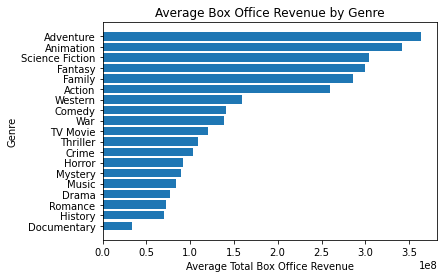

In [47]:
import matplotlib.pyplot as plt

# prepare data for plotting
plot_data = genre_revenue_performance.sort_values(by='avg_total_gross', ascending=True)

# create horizontal bar chart
plt.figure()
plt.barh(plot_data.index, plot_data['avg_total_gross'])
plt.xlabel('Average Total Box Office Revenue')
plt.ylabel('Genre')
plt.title('Average Box Office Revenue by Genre')

"""
Based on box office performance, a new movie studio should prioritise genres such as Adventure, Animation, Science Fiction, Fantasy, and Family, which consistently generate higher revenues and show strong market demand.  
Genres such as Drama, Romance, Documentary, and History appear less commercially viable on average and may be riskier as initial focus areas for a new studio.

"""
plt.show()


# STEP 8: Anova test 
*---statistical test that some genres eg animation, adventure  etc have more revenue than others

ANOVA test

Why?
* comparing means of atleast more than two samples (we have many genres)
* Each genre has its own revenue, so the revenue will be analysed as categories

Hypothesis testing:
* Null hypothesis (H0) - mean revenue is the same across all genres 
* Alternative hypothesis (H1) - at least one genre has a different mean revenue

Rejection creteria:
If p-value < 0.05: Reject H0
if p-value > 0.05 : Fail to reject H0

In [48]:
# keep only relevant columns
anova_data = genre_revenue_expanded[['genre', 'total_gross']].dropna()

from scipy.stats import f_oneway

# create a list of arrays: one array per genre
genre_groups = [
    group['total_gross'].values
    for _, group in anova_data.groupby('genre')
    if len(group) > 1  # ANOVA requires at least 2 observations per group
]

f_stat, p_value = f_oneway(*genre_groups)


"""
From our analysis our p- value being a smaller value which is less than p < 0.05 we reject the null hypothesis that some films and genres make more money than others
"""
f_stat, p_value



(49.67279806490318, 1.0323958978419716e-160)

## Theme 2: what audience or rating profiles to target

Question we are answering
* What audience-friendly content profile is most commercially viable (e.g., PG-13 vs R), and how does audience reception relate to revenue.

Datasets to use
* Rotten tomatoes movie info: movie_info (MPAA rating)
* TMDB metadata: movies_clean (audience rating and vote volume)
* Box office: movie_gross_clean (revenue)

Columns we need
* From movie_info: id, rating (MPAA), theater_date (for year if needed), genre (optional)
* From movies_clean: title, vote_average, vote_count
* From movie_gross_clean: title, year, total_gross

Merge logic
* Practical approach: link TMDB + box office first on title, then bring in movie_info['rating'] by matching title (if movie_info has a title column in your file; if it doesn’t, we will not merge RT into the core table and will instead use TMDB vote metrics for this theme)

Analysis outputs
* Revenue distribution by MPAA rating (G/PG/PG-13/R/NR) if mergeable
* Relationship between vote_average and total_gross (scatter or grouped averages)
* use vote_count as a “confidence” filter (e.g., only movies with vote_count above a threshold)

End goal
A clear audience targeting position such as:
“Focus on PG-13 films with strong audience ratings and broad appeal,” backed by revenue comparisons and audience reception evidence.

# STEP 1: loading audience rating dataset, revenue datset and merge them

In [49]:
## audience reception and box office performance
"""
This section examines how audience reception, measured using TMDB ratings and vote counts, relates to box office revenue performance.  
This helps identify whether movies that are better received by audiences also tend to perform better commercially.
"""
# prepare audience reception data from TMDB
audience_tmdb = movies_clean[['title', 'vote_average', 'vote_count']].copy()

# prepare box office revenue data
boxoffice_revenue = movie_gross_clean[['title', 'year', 'total_gross']].copy()

# merge audience reception with box office revenue
audience_revenue = audience_tmdb.merge(
    boxoffice_revenue,
    on='title',
    how='inner'
)

"""
The merged dataset links box office revenue with audience reception metrics from TMDB.  
This allows assessment of whether movies that are better received by audiences tend to achieve stronger commercial performance.
"""
# inspect merged dataset
audience_revenue.head(), audience_revenue.shape



(                      title  vote_average  vote_count  year   total_gross
 0  How to Train Your Dragon           7.7        7610  2010  4.949000e+08
 1                Iron Man 2           6.8       12368  2010  6.239000e+08
 2                 Inception           8.3       22186  2010  8.283000e+08
 3               Toy Story 3           7.7        8340  2010  1.067000e+09
 4             Despicable Me           7.2       10057  2010  5.431000e+08,
 (1696, 5))

## audience reception and box office performance

This section examines how audience reception, measured using TMDB ratings and vote counts, relates to box office revenue performance.  
This helps identify whether movies that are better received by audiences also tend to perform better commercially.

# prepare audience reception data from TMDB
audience_tmdb = movies_clean[['title', 'vote_average', 'vote_count']].copy()

# prepare box office revenue data
boxoffice_revenue = movie_gross_clean[['title', 'year', 'total_gross']].copy()

# merge audience reception with box office revenue
audience_revenue = audience_tmdb.merge(
    boxoffice_revenue,
    on='title',
    how='inner'
)

The merged dataset links box office revenue with audience reception metrics from TMDB.  
This allows assessment of whether movies that are better received by audiences tend to achieve stronger commercial performance.

# inspect merged dataset
audience_revenue.head(), audience_revenue.shape



In [50]:
## audience ratings and box office performance
"""
This step examines whether movies that receive higher audience ratings also tend to generate higher box office revenue.  
Audience ratings are measured using TMDB average ratings, while box office performance is measured using total gross revenue.
"""

# create rating bands directly on the main dataframe
audience_revenue['rating_band'] = pd.cut(
    audience_revenue['vote_average'],
    bins=[0, 5, 6, 7, 8, 10],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# summarise revenue by rating band
rating_band_perf = (
    audience_revenue
    .groupby('rating_band')
    .agg(
        movie_count=('title', 'count'),
        avg_total_gross=('total_gross', 'mean'),
        median_total_gross=('total_gross', 'median')
    )
)

""""
Box office performance increases steadily with stronger audience ratings.  
Movies with low or very low audience ratings generate substantially lower average and median revenues, while films rated highly by audiences perform markedly better at the box office.  
Although very highly rated films are fewer in number, they achieve the highest median revenues, suggesting that strong audience reception is associated with commercial success.

"""
rating_band_perf



,movie_count,avg_total_gross,median_total_gross
rating_band,,,
Very Low,84,7.005761e+07,36550000.0
Low,460,9.958211e+07,47850000.0
Medium,751,1.350948e+08,51000000.0
High,363,2.029707e+08,75400000.0
Very High,38,2.243606e+08,140300000.0


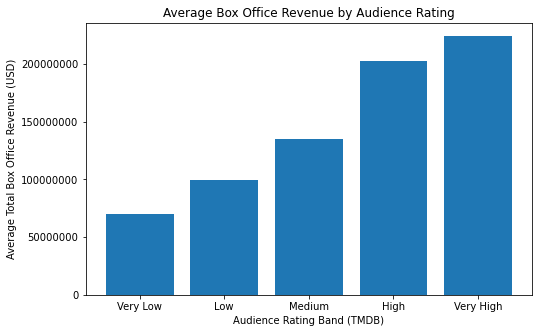

In [51]:
import matplotlib.pyplot as plt

# prepare plot data (ensure correct order)
plot_data = rating_band_perf.loc[
    ['Very Low', 'Low', 'Medium', 'High', 'Very High']
]

plt.figure(figsize=(8, 5))
plt.bar(
    plot_data.index,
    plot_data['avg_total_gross']
)

plt.xlabel('Audience Rating Band (TMDB)')
plt.ylabel('Average Total Box Office Revenue (USD)')
plt.title('Average Box Office Revenue by Audience Rating')

plt.ticklabel_format(style='plain', axis='y')  # avoid scientific notation


"""
To maximise commercial performance, the studio should focus on producing films that achieve strong audience reception.  
Movies with higher audience ratings consistently generate higher box office revenues, suggesting that prioritising quality and broad audience appeal is more important than targeting narrow audience segments.

"""


"""
The chart shows a clear positive relationship between audience ratings and box office performance.  
Movies with higher audience ratings consistently achieve higher average box office revenues ($203M -224M), indicating that strong audience reception is strongly associated with commercial success.
"""

"""
While higher audience ratings are associated with stronger box office performance, these high ratings are not evenly distributed across all movies.  
Films that achieve high audience ratings tend to be well-produced, broadly appealing titles—often within genres such as animation, adventure, family, and science fiction.  
These films typically balance quality storytelling with mass-market accessibility, making them more likely to attract large audiences and generate higher revenues.
"""

"""
For investors, the key implication is not simply to chase high ratings, but to invest in films with characteristics that consistently earn strong audience approval—namely, high-quality productions with broad appeal.  
Targeting films that audiences rate highly, particularly within commercially proven genres, is more likely to result in strong box office returns.
"""
plt.show()
## the genres with high rating are drama,comedy, action etc..those with less rating are western, music, war etc

# Defining high-ranked movies

In [52]:
## defining high-ranked movies
"""
High-ranked movies are defined as films with an average audience rating of 7.0 or higher on TMDB.  
This threshold represents strong audience approval and is commonly used to distinguish well-received films.
"""
## creating a combined audience-rating + genre dataset
"""
To identify which genres and movie examples are ranked highly by audiences, we create one dataset that combines:  
1) audience reception metrics (TMDB vote_average and vote_count), and  
2) genre labels (from the expanded genre dataset created in Theme 1)
"""

# merge audience ratings with genre names using movie titles
audience_genre = audience_revenue.merge(
    genre_revenue_expanded[['title', 'genre']],
    on='title',
    how='inner'
)

# inspect the combined dataset
audience_genre.head(), audience_genre.shape




(                      title  vote_average  vote_count  year  total_gross  \
 0  How to Train Your Dragon           7.7        7610  2010  494900000.0   
 1  How to Train Your Dragon           7.7        7610  2010  494900000.0   
 2  How to Train Your Dragon           7.7        7610  2010  494900000.0   
 3  How to Train Your Dragon           7.7        7610  2010  494900000.0   
 4                Iron Man 2           6.8       12368  2010  623900000.0   
 
   rating_band      genre  
 0        High    Fantasy  
 1        High  Adventure  
 2        High  Animation  
 3        High     Family  
 4      Medium  Adventure  ,
 (5354, 7))

In [53]:
## defining high-ranked movies
"""
High-ranked movies are defined as films with an average audience rating of 7.0 or higher.  
This threshold captures movies that are well received by audiences and helps identify genres associated with strong audience approval.
"""
# filter movies with strong audience ratings
high_ranked_movies = audience_genre[audience_genre['vote_average'] >= 7.0]

# check size of the filtered dataset
high_ranked_movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 5345
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   title         1497 non-null   object  
 1   vote_average  1497 non-null   float64 
 2   vote_count    1497 non-null   int64   
 3   year          1497 non-null   int64   
 4   total_gross   1497 non-null   float64 
 5   rating_band   1497 non-null   category
 6   genre         1497 non-null   object  
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 83.5+ KB


In [54]:
## genres associated with high-ranked movies
"""
This step counts how often each genre appears among highly rated movies (vote_average ≥ 7.0).  
Genres that appear frequently in this group are more likely to produce films that audiences rate highly.
"""
# summarise high-ranked movies by genre
high_ranked_genres = (
    high_ranked_movies
    .groupby('genre')
    .agg(
        high_rated_movie_count=('title', 'count'),
        avg_rating=('vote_average', 'mean')
    )
    .sort_values(by='high_rated_movie_count', ascending=False)
)

"""
Highly rated movies are not evenly distributed across genres.  
Drama appears most frequently among high-rated films, indicating that it consistently produces well-received content.  
However, genres such as animation, family, adventure, and crime combine both strong audience ratings and meaningful volume, making them particularly attractive for investment.  
These genres are more likely to produce films that audiences rate highly, increasing their likelihood of commercial success.
"""
high_ranked_genres


,high_rated_movie_count,avg_rating
genre,,
Drama,421,7.505938
Comedy,135,7.491852
Action,109,7.344037
Adventure,109,7.470642
Thriller,103,7.491262
Romance,95,7.450526
Science Fiction,65,7.392308
Crime,63,7.525397
Animation,56,7.653571


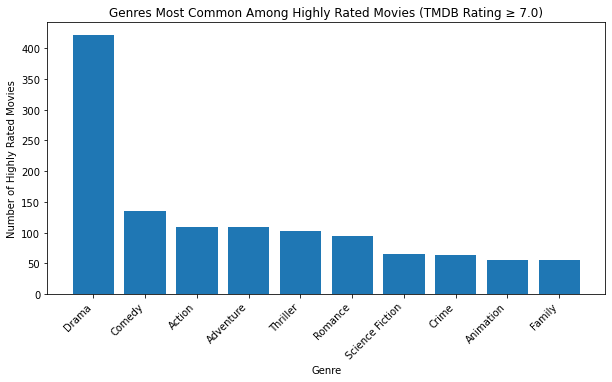

In [55]:
import matplotlib.pyplot as plt

# select top genres for readability
top_genres = high_ranked_genres.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_genres.index, top_genres['high_rated_movie_count'])

plt.xlabel('Genre')
plt.ylabel('Number of Highly Rated Movies')
plt.title('Genres Most Common Among Highly Rated Movies (TMDB Rating ≥ 7.0)')
plt.xticks(rotation=45, ha='right')

"""
The chart highlights that genres such as drama, comedy, adventure, and action appear most frequently among highly rated movies.  
While drama dominates in volume, genres like animation, family, and adventure combine strong audience approval with commercial relevance, making them particularly attractive for investment.

"""
plt.show()


# STEP 4: Independent t test

* Is there enough statistical evidence that highly rated movies earn more revenue?

## hypothesis testing: do highly rated movies earn more?

We test whether movies with stronger audience ratings (TMDB vote_average) have higher average box office revenue (total_gross).  
To reduce noise from movies with very few votes, we restrict the sample to films with at least 1,000 audience votes.

- H0: There is no difference in mean revenue between highly rated and lower-rated films.  
- H1: Highly rated films have higher mean revenue than lower-rated films.


In [56]:
# Create ONE filtered dataset (only 1 new variable)
# keep movies with enough votes to make ratings reliable
audience_revenue_final = audience_revenue[audience_revenue['vote_count'] >= 1000].copy()

"""
## preparing the dataset for hypothesis testing

After filtering the data to include only movies with at least 1,000 audience votes, the dataset contains **806 movies** and **6 variables**.
This filtering step ensures that audience ratings are based on sufficiently large numbers of votes, improving the reliability of the analysis.
The resulting dataset includes:
- **title**: the movie name
- **vote_average**: average audience rating from TMDB
- **vote_count**: number of audience votes (used as a reliability filter)
- **total_gross**: total box office revenue
- **year**: release year
- **(one additional identifier column, depending on earlier merges)**

With 806 observations, the sample size is large enough to support statistical comparison between highly rated and lower-rated films.

"""
audience_revenue_final.shape


(806, 6)

In [57]:
# We divide movies into high-rated and lower-rated groups.
"""
## defining audience rating groups
To enable statistical comparison, movies are divided into two groups based on audience ratings:
- **High rated films**: vote_average ≥ 6.5 
- **Lower rated films**: vote_average < 6.5 
This classification allows us to directly compare box office performance between films that are well received by audiences and those that are less well received.
"""
# label movies by audience rating group
audience_revenue_final['rating_group'] = audience_revenue_final['vote_average'].apply(
    lambda x: 'High rated (≥6.5)' if x >= 6.5 else 'Lower rated (<6.5)'
)

# check how many movies fall into each group
audience_revenue_final['rating_group'].value_counts()

#High rated (≥7) - 456 movies
#Lower rated (<7) - 330 movies
#we compare their average and median box office revenue to see whether highly rated films actually earn more before doing any statistical test.

High rated (≥6.5)     476
Lower rated (<6.5)    330
Name: rating_group, dtype: int64

In [58]:
# compare average box office revenue between the two groups
"""
## comparing box office revenue across rating groups

Before conducting formal hypothesis testing, we compare the average and median box office revenue of highly rated and lower-rated films.  
This descriptive comparison provides context for understanding the magnitude of any observed differences between the two groups.
"""

"""
High rated films (≥6.5)
* Mean revenue ≈ $297M
* Median revenue ≈ $163M
Lower rated films (<6.5)
* Mean revenue ≈ $213M
* Median revenue ≈ $141M
"""
# compare average and median revenue by rating group
audience_revenue_final.groupby('rating_group').agg(
    movie_count=('title', 'count'),
    avg_total_gross=('total_gross', 'mean'),
    median_total_gross=('total_gross', 'median')
)

,movie_count,avg_total_gross,median_total_gross
rating_group,,,
High rated (≥6.5),476,2.719111e+08,150900000.0
Lower rated (<6.5),330,2.023632e+08,146700000.0


# HYPOTHESIS TESTING

## Hypothesis testing: audience ratings and box office revenue

An independent two-sample t-test (Welch’s t-test) is used to formally test whether the difference in average box office revenue between highly rated and lower-rated films is statistically significant.
- **Null hypothesis (H₀):** There is no difference in mean total_gross between highly rated and lower-rated films.  
- **Alternative hypothesis (H₁):** Highly rated films have higher mean total_gross than lower-rated films.

Welch’s t-test is applied because it does not assume equal variances between the two groups.



In [59]:
from scipy.stats import ttest_ind

# extract revenue for each group
high_rev = audience_revenue_final.loc[
    audience_revenue_final['rating_group'] == 'High rated (≥6.5)', 'total_gross'
]

low_rev = audience_revenue_final.loc[
    audience_revenue_final['rating_group'] == 'Lower rated (<6.5)', 'total_gross'
]

# run Welch's independent t-test
t_stat, p_value = ttest_ind(high_rev, low_rev, equal_var=False)

"""
## interpretation

Using Welch’s two-sample t-test, we compared mean total_gross for highly rated films (vote_average ≥ 7) versus lower-rated films (vote_average < 7), restricting to movies with vote_count ≥ 1,000.
If p < 0.05, we reject H0 and conclude that highly rated films earn significantly higher average box office revenue.  
If p ≥ 0.05, we fail to reject H0 and conclude that the observed difference could be due to chance.
"""

"""
### interpretation of results
p-value ≈ 0.00008 is far below 0.05.Therefore, we reject the null hypothesis and conclude that Highly rated movies earn significantly more at the box office than lower-rated movies.
There is a statistically significant difference in average box office revenue

** Strong audience ratings are associated with higher revenue

Conclusions
Audience reception is an important signal of commercial performance
The independent t-test shows that the difference in mean box office revenue between highly rated and lower-rated films is statistically significant (p < 0.05).
This result supports the earlier descriptive analysis and visualisations, indicating that movies with stronger audience ratings tend to achieve higher box office revenue.  
While this analysis does not establish causality, it provides statistical evidence of a strong association between audience approval and commercial success.
"""

t_stat, p_value


(3.9648051434409886, 8.000047904547464e-05)

# Theme 3: Do globally released films earn significantly more than region-specific films?
**Objective**

The aim of this analysis is to decide whether world releases (globally releases) result in much higher total gross revenue than region releases.

We first created a new categorical variable called release_type based on the film’s release region:

Films with region code XWW were classified as Worldwide

All other region codes were classified as Region-specific

This allowed us to group films into two mutually exclusive categories for comparison.

In [60]:
query = """
SELECT title, region
FROM movie_akas;
"""

movie_akas = pd.read_sql(query, conn)
movie_akas

,title,region
0,Джурасик свят,BG
1,Jurashikku warudo,JP
2,Jurassic World: O Mundo dos Dinossauros,BR
3,O Mundo dos Dinossauros,BR
4,Jurassic World,FR
...,...,...
331698,Sayonara kuchibiru,None
331699,Farewell Song,XWW
331700,La atención,None
331701,La atención,ES


In [61]:
merged_df = pd.merge(
    movie_akas,
    movie_gross_clean,
    left_on="title",
    right_on="title",
    how="inner"
)
merged_df

,title,region,studio,domestic_gross,foreign_gross,year,total_gross
0,John Carter,PT,BV,73100000.0,211100000.0,2012,284200000.0
1,John Carter,FR,BV,73100000.0,211100000.0,2012,284200000.0
2,John Carter,HR,BV,73100000.0,211100000.0,2012,284200000.0
3,John Carter,CL,BV,73100000.0,211100000.0,2012,284200000.0
4,John Carter,ES,BV,73100000.0,211100000.0,2012,284200000.0
...,...,...,...,...,...,...,...
7250,The Big Sick,US,LGF,42900000.0,13500000.0,2017,56400000.0
7251,The Big Sick,None,LGF,42900000.0,13500000.0,2017,56400000.0
7252,The Big Sick,FR,LGF,42900000.0,13500000.0,2017,56400000.0
7253,Poster Boys,IN,Sony,97000.0,2400000.0,2017,2497000.0


In [62]:
#checking for duplicates
merged_df.duplicated().sum()

443

In [63]:
#removing duplicates
new_merged_df = merged_df.drop_duplicates(subset=["title", "region"])

In [64]:
#removing missing values from region
clean_merged_df = new_merged_df.dropna(subset=["region"])
clean_merged_df

,title,region,studio,domestic_gross,foreign_gross,year,total_gross
0,John Carter,PT,BV,73100000.0,211100000.0,2012,284200000.0
1,John Carter,FR,BV,73100000.0,211100000.0,2012,284200000.0
2,John Carter,HR,BV,73100000.0,211100000.0,2012,284200000.0
3,John Carter,CL,BV,73100000.0,211100000.0,2012,284200000.0
4,John Carter,ES,BV,73100000.0,211100000.0,2012,284200000.0
...,...,...,...,...,...,...,...
7247,Loving Vincent,CL,Good Deed,6700000.0,35500000.0,2017,42200000.0
7249,Bad Moms,US,STX,113300000.0,70700000.0,2016,184000000.0
7250,The Big Sick,US,LGF,42900000.0,13500000.0,2017,56400000.0
7252,The Big Sick,FR,LGF,42900000.0,13500000.0,2017,56400000.0


In [65]:
# Analysing to understand how location influences revenue
region_revenue = (
    clean_merged_df
    .groupby("region")["total_gross"]
    .mean().round(2)
    .sort_values(ascending=False)
)

region_revenue

region
BD    6.230000e+08
ID    5.362000e+08
SK    5.342500e+08
VN    4.405438e+08
GE    4.158750e+08
          ...     
AM    8.744000e+06
AE    7.095500e+06
MM    8.075000e+05
CU    7.010000e+05
JO    1.340000e+05
Name: total_gross, Length: 83, dtype: float64

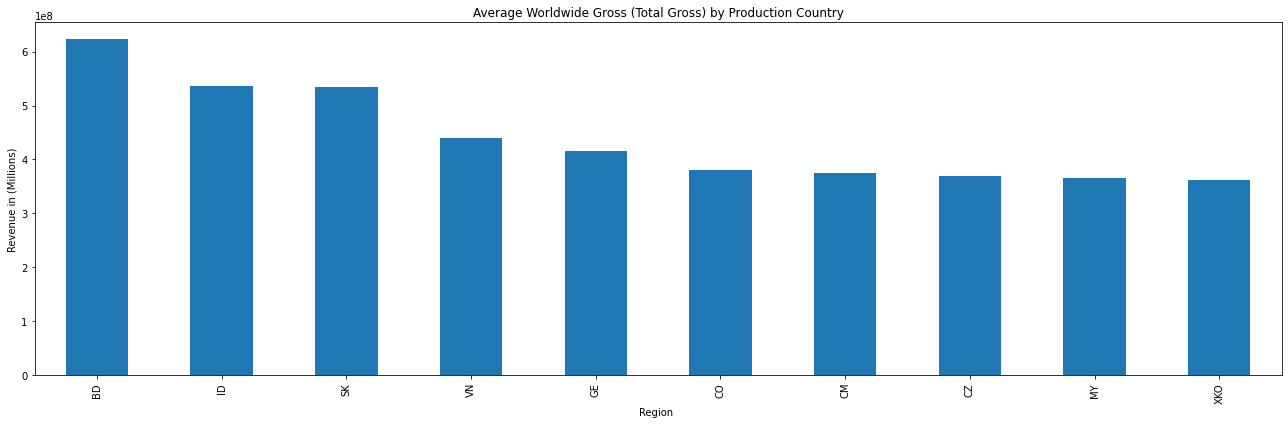

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

region_revenue.head(10).plot(kind="bar")

plt.title("Average Worldwide Gross (Total Gross) by Production Country")
plt.xlabel("Region ")
plt.ylabel("Revenue in (Millions)")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

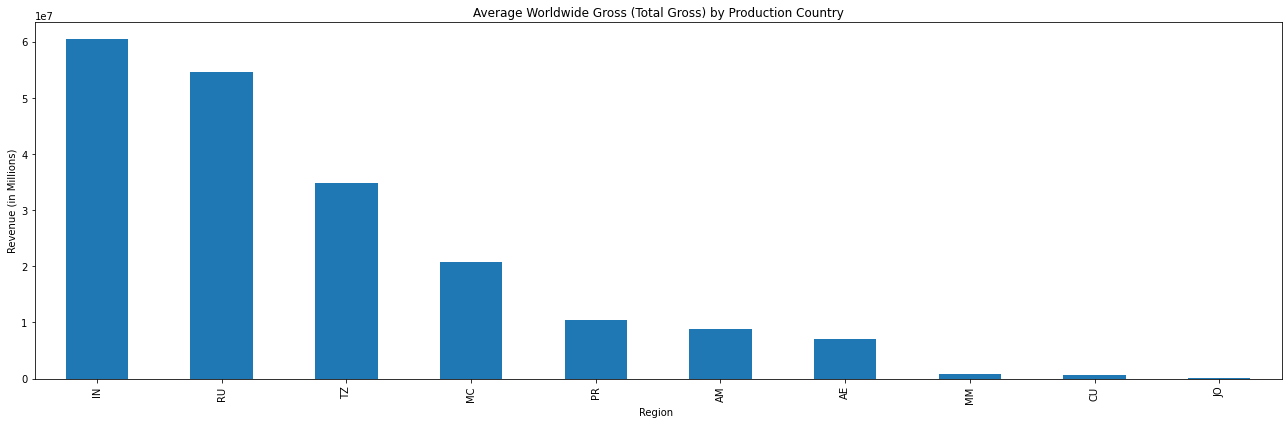

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

region_revenue.tail(10).plot(kind="bar")

plt.title("Average Worldwide Gross (Total Gross) by Production Country")
plt.xlabel("Region ")
plt.ylabel("Revenue (in Millions)")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- From the region versus revenue analysis, movie revenue is unevenly distributed across the regions. For our top 10 regions leading with analysis, we see that BD has the highest revenue(623000000.0), making it the strongest market among the regions listed in IMDb.

- Following closely is ID and SK, generating over 530M dollars, indicating that there is a consistency in box office performance in those regions.

- For our bottom 10, we have regions like IN(India), IU(Armenia), IZ(),MC(Monaco) are seen to generate lower revenue showing that  they're not fairly doing well like the other regions.

- This can be due to the fact that people in these regions may not like movies, ticket sales being quite low(case of India although it has a huge population). Monano and Armenia can be attributed maybe to their very low populations hence lower sales.

- Additionally, there are other factors in regions that also impact how much revenues films make. 
- Some regions simply have a larger market share and have a larger movie-going populations. Larger markets therefore mean higher potential revenue.
- Ticket prices and purchasing power also varies by regions. High income regions but tickets at higher prices hence higher revenues. In other areas with lower purchasing power, this means that tickets will go for less prices hence low revenues.
- Cultural preferences- different regions have difference movie preference. Therefore, movies that are well aligned in a region will earn more compared to those that are not.
- Cinema access and infrastructure, regions with few theatres, will have lower revenues compared to regions that have advanced infrasture and numerous cinema outlets.

we first created a new categorical variable called release_type based on the film’s release region:

Films with region code XWW were classified as Worldwide

All other region codes were classified as Region-specific

This allowed us to group films into two mutually exclusive categories for comparison.

we examined the distribution of these two release types and it showed that most films are released in specific regions while only a smaller subset are released world wide 

. Region-specific films: 5,167

. Worldwide films: 303

In [69]:
release_type = []

for r in clean_merged_df["region"]:
    if r == "XWW":
        release_type.append("Worldwide")
    else:
        release_type.append("Region-specific")

clean_merged_df.loc[:, "release_type"] = release_type

c:\Users\AbigaelKariuki\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\AbigaelKariuki\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [70]:
clean_merged_df["release_type"].value_counts()

Region-specific    5167
Worldwide           303
Name: release_type, dtype: int64

Statistical Method

A one-way ANOVA test was used to compare the mean total gross revenue between the release types. ANOVA is appropriate here because we are comparing the means of a continuous variable (total gross) across categorical groups.

**Hypothesis Testing**

**Null Hypothesis** - The mean total gross revenue is the same for globally released films and region-specific films.

**Alternative Hypothesis** - The mean total gross revenue differs between globally released films and region-specific films.

In [71]:
from scipy.stats import f_oneway

worldwide = clean_merged_df.loc[
    clean_merged_df["release_type"] == "Worldwide",
    "total_gross"
]

regional = clean_merged_df.loc[
    clean_merged_df["release_type"] == "Region-specific",
    "total_gross"
]

f_stat, p_value = f_oneway(worldwide, regional)

f_stat, p_value

(22.68188018639342, 1.9609799270692467e-06)

The p-value is far below the standard significance level of 0.05. Thus, we reject the null hypothesis.

This provides strong statistical evidence that globally released films earn significantly different mean total gross revenue compared to region-specific films.

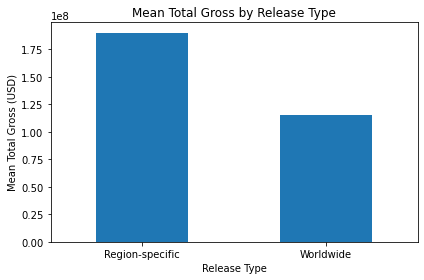

In [72]:
import matplotlib.pyplot as plt

mean_gross = clean_merged_df.groupby("release_type")["total_gross"].mean()

plt.figure(figsize=(6,4))
mean_gross.plot(kind="bar", rot=0)

plt.title("Mean Total Gross by Release Type")
plt.xlabel("Release Type")
plt.ylabel("Mean Total Gross (USD)")
plt.tight_layout()
plt.show()

It can be seen in the bar chart that the mean total gross revenue of region-specific films is greater than that of films released globally.

This shows that on average, films produced in specific areas earn more total gross revenue per film than those that are categorized as worldwide releases.

### Business Recommendation 1

### Business Recommendation 2

### Business Recommendation 3